In [1]:
# ANALISE EXPLORATORIA

In [2]:
# Importação dos dados de treinamento
# Dados de Entrada: Tabela contendo 2 colunas, sendo a coluna 1 em formato de data  e a coluna 2 contendo o dado de taxa de falha

import pandas as pd
df = pd.read_excel(r'C:\Users\mayca\Google Drive\Especialização em Inteligência Artificial e Big Data\TCC - Metodologia e Projeto para Inteligência Artificial e Big Data\Módulo 4 - Resultados\Modelo\dados_LLD_vtrain.xlsx')

df.head()

,Production month,FR_12MIS
0,2012-01-01,1.1204
1,2012-02-01,0.6338
2,2012-03-01,0.8232
3,2012-04-01,0.8967
4,2012-05-01,0.8333


In [3]:
# Avaliação do formato da tabela

df.shape

(102, 2)

In [4]:
# Avaliação do tipo de dado e quantidade de registros não nulos na tabela

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Production month  102 non-null    datetime64[ns]
 1   FR_12MIS          102 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [5]:
# Avalição das principais métricas de estatística descritiva

df.describe()

,FR_12MIS
count,102.000000
mean,0.572850
std,0.173000
min,0.338500
25%,0.444225
50%,0.535700
75%,0.642325
max,1.372500


In [6]:
# Cálculo da Média

print('Média:')
df['FR_12MIS'].mean()

Média:


0.5728500000000003

In [7]:
# Cálculo da Variância

print('Variância:')
df['FR_12MIS'].var()

Variância:


0.029928986089108926

In [8]:
# Cálculo da Obliquidade

print('Obliquidade:')
df['FR_12MIS'].skew()

Obliquidade:


1.776193561244715

In [9]:
# Cálculo de Kurtosis

print('Kurtosis:')
df['FR_12MIS'].kurtosis()

Kurtosis:


4.848870308078913

In [10]:
# Avaliação do Teste Estatístico de Normalidade de Kolmogorov-Smirnov

from scipy.stats import kstest
result_KSTest = kstest(df['FR_12MIS'],"uniform")

print('Teste de Normalidade de Kolmogorov-Smirnov:')
print(result_KSTest)

C:\Users\mayca\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Teste de Normalidade de Kolmogorov-Smirnov:
KstestResult(statistic=0.3385, pvalue=6.252386906975894e-11)


In [11]:
# Separação do Conjunto de Treinamento em uma nova tabela contendo os meses de produção nas linhas e a taxa de falha cálculo para o respectivo nas colunas

da = pd.read_excel(r'C:\Users\mayca\Google Drive\Especialização em Inteligência Artificial e Big Data\TCC - Metodologia e Projeto para Inteligência Artificial e Big Data\Módulo 4 - Resultados\Modelo\dados_LLD_vanuais.xlsx')

da.head()

,Month,FR_2012,FR_2013,FR_2014,FR_2015,FR_2016,FR_2017,FR_2018,FR_2019
0,Jan,1.1204,0.6549,0.5843,0.4829,0.5049,0.6235,0.4306,0.5137
1,Feb,0.6338,0.6308,0.5751,0.6034,0.4395,0.6972,0.4552,0.3904
2,Mar,0.8232,0.6716,0.5560,0.5537,0.7207,0.6574,0.4742,0.4361
3,Apr,0.8967,0.6119,0.6435,0.7209,0.5089,0.5073,0.6171,0.4399
4,May,0.8333,0.6330,0.6584,0.6877,0.4387,0.6020,0.5808,0.3448


In [12]:
# Avaliação do Teste Estatístico de Sazonalidade de Kruskal-Wallis para todo o período avaliado (8 anos)

from scipy.stats import kruskal
result_KWTest = kruskal(da['FR_2012'],da['FR_2013'],da['FR_2014'],da['FR_2015'],da['FR_2016'],da['FR_2017'],da['FR_2018'],da['FR_2019'])

print('Teste de Sazonalidade de Kruskal-Wallis 2012-2019:')
print(result_KWTest)

Teste de Sazonalidade de Kruskal-Wallis 2012-2019:
KruskalResult(statistic=57.824312714776624, pvalue=4.098002511417409e-10)


In [13]:
# Avaliação do Teste Estatístico de Sazonalidade de Kruskal-Wallis para uma seção do período (4 anos iniciais)

from scipy.stats import kruskal
result_KWTest = kruskal(da['FR_2012'],da['FR_2013'],da['FR_2014'],da['FR_2015'])

print('Teste de Sazonalidade de Kruskal-Wallis 2012-2015:')
print(result_KWTest)

Teste de Sazonalidade de Kruskal-Wallis 2012-2015:
KruskalResult(statistic=14.343537414965937, pvalue=0.0024729461149271322)


In [14]:
# Avaliação do Teste Estatístico de Sazonalidade de Kruskal-Wallis para outra seção do período (4 anos finais)

from scipy.stats import kruskal
result_KWTest = kruskal(da['FR_2016'],da['FR_2017'],da['FR_2018'],da['FR_2019'])

print('Teste de Sazonalidade de Kruskal-Wallis 2016-2019:')
print(result_KWTest)

Teste de Sazonalidade de Kruskal-Wallis 2016-2019:
KruskalResult(statistic=25.454931972789097, pvalue=1.24025600630827e-05)


In [15]:
# pip install pymannkendall

In [16]:
# Avaliação do Teste Estatístico de Tendência de Mann-Kendall

import pymannkendall as mk

print('Teste de Tendência de Mann-Kendall:')
mk.original_test(df['FR_12MIS'])

Teste de Tendência de Mann-Kendall:


Mann_Kendall_Test(trend='decreasing', h=True, p=2.9976021664879227e-14, z=-7.598497022269172, Tau=-0.5103863327509222, s=-2629.0, var_s=119617.66666666667, slope=-0.0030945945945945945, intercept=0.6919770270270271)

In [17]:
# pip install statsmodels

In [18]:
# Avaliação do Teste Estatístico de Estacionariedade de Dickey-Fuller

from statsmodels.tsa.stattools import adfuller

print('Teste de Estacionariedade de Dickey-Fuller:')
adfuller(df['FR_12MIS'])

Teste de Estacionariedade de Dickey-Fuller:


(-3.1156830703319502,
 0.025414131764921633,
 1,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 -155.1285085635319)

In [19]:
# IMPLEMENTAÇÃO DO MODELO ARIMA

In [20]:
# Escolhendo parametros do modelo ARIMA

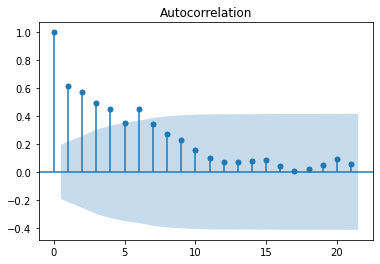

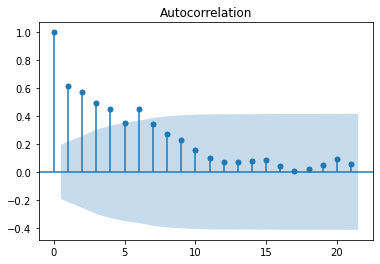

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['FR_12MIS'])

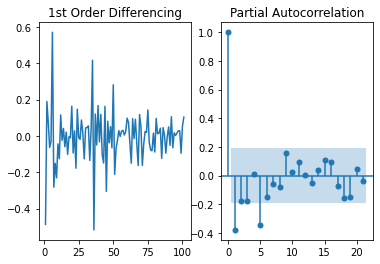

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df['FR_12MIS'].diff())

ax2 = f.add_subplot(122)
plot_pacf(df['FR_12MIS'].diff().dropna(),ax=ax2)

plt.show()

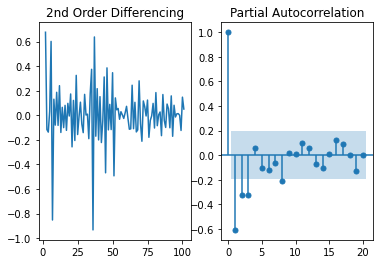

In [23]:
g = plt.figure()
ax1 = g.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df['FR_12MIS'].diff().diff())

ax2 = g.add_subplot(122)
plot_pacf(df['FR_12MIS'].diff().diff().dropna(),ax=ax2)

plt.show()

In [24]:
# Treinando o modelo ARIMA

In [25]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(df['FR_12MIS'],order=(0,1,2))
model = arima_model.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.FR_12MIS   No. Observations:                  101
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  69.066
Method:                       css-mle   S.D. of innovations              0.122
Date:                Tue, 09 Aug 2022   AIC                           -130.131
Time:                        20:32:02   BIC                           -119.671
Sample:                             1   HQIC                          -125.897
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0048      0.003     -1.396      0.163      -0.012       0.002
ma.L1.D.FR_12MIS    -0.6099      0.097     -6.259      0.000      -0.801      -0.419
ma.L2.D.FR_12MIS    -0.1158 

C:\Users\mayca\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [26]:
# Testando o modelo ARIMA

In [27]:
# Importação dos dados de teste
# Dados de Entrada: Tabela contendo 2 colunas, sendo a coluna 1 em formato de data  e a coluna 2 contendo o dado de taxa de falha

df_test = pd.read_excel(r'C:\Users\mayca\Google Drive\Especialização em Inteligência Artificial e Big Data\TCC - Metodologia e Projeto para Inteligência Artificial e Big Data\Módulo 4 - Resultados\Modelo\dados_LLD_vtest.xlsx')

df_test.head()

,Production month,FR_12MIS
0,2020-07-01,0.5495
1,2020-08-01,0.4526
2,2020-09-01,0.4456
3,2020-10-01,0.5163
4,2020-11-01,0.4812


In [78]:
y_ARIMA = pd.Series(model.forecast(24)[0],index=df_test['FR_12MIS'].index)
y_true = df_test['FR_12MIS']

# Criando uma tabela de resultados contendo os dados observados e o resultado da predição a partir do modelo ARIMA

df_test_results = df_test.copy(deep=True)
df_test_results['ARIMA'] = y_ARIMA
df_test_results.head()

,FR_12MIS,ARIMA
Production month,,
2020-07-01,0.5495,0.443011
2020-08-01,0.4526,0.423266
2020-09-01,0.4456,0.418481
2020-10-01,0.5163,0.413697
2020-11-01,0.4812,0.408913


In [29]:
# Avaliação de Desempenho do Modelo ARIMA

In [30]:
import numpy as np

mape = np.mean(np.abs(y_ARIMA - y_true)/np.abs(y_true))
mae = np.mean(np.abs(y_ARIMA - y_true))
mpe = np.mean((y_ARIMA - y_true)/y_true)
rmse = np.mean((y_ARIMA - y_true)**2)**.5
corr = np.corrcoef(y_ARIMA, y_true)[0,1]

print('Mean absolute percentage error - mape:', mape)
print('Mean absolute error - mae:', mae)
print('Mean percentage error - mpe:', mpe)
print('Root mean square error - rmse:', rmse)
print('Correlation coeficient:', corr)

Mean absolute percentage error - mape: 3.1195206345819044
Mean absolute error - mae: 0.13403621422860734
Mean percentage error - mpe: 2.8262176400884527
Root mean square error - rmse: 0.16604111207781846
Correlation coeficient: 0.73791366979466


In [31]:
# IMPLEMENTAÇÃO DO MODELO LSTM

In [32]:
df=df.set_index("Production month")
df.head()

,FR_12MIS
Production month,
2012-01-01,1.1204
2012-02-01,0.6338
2012-03-01,0.8232
2012-04-01,0.8967
2012-05-01,0.8333


In [33]:
df_test=df_test.set_index("Production month")
df_test.head()

,FR_12MIS
Production month,
2020-07-01,0.5495
2020-08-01,0.4526
2020-09-01,0.4456
2020-10-01,0.5163
2020-11-01,0.4812


In [ ]:
# Treinando o modelo LSTM

In [34]:
train_data = df
test_data = df_test

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [36]:
import tensorflow as tf

# fix random seed for reproducibility
tf.random.set_seed(7)

In [37]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [38]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20


<ipython-input-38-dcd31fc91329>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  lstm_model.fit_generator(generator,epochs=20)


90/90 [==============================] - 4s 10ms/step - loss: 0.0131
Epoch 2/20
90/90 [==============================] - 1s 10ms/step - loss: 0.0100
Epoch 3/20
90/90 [==============================] - 1s 11ms/step - loss: 0.0091
Epoch 4/20
90/90 [==============================] - 1s 10ms/step - loss: 0.0095
Epoch 5/20
90/90 [==============================] - 1s 10ms/step - loss: 0.0098
Epoch 6/20
90/90 [==============================] - 1s 10ms/step - loss: 0.0100
Epoch 7/20
90/90 [==============================] - 1s 10ms/step - loss: 0.0090
Epoch 8/20
90/90 [==============================] - 1s 9ms/step - loss: 0.0090
Epoch 9/20
90/90 [==============================] - 1s 9ms/step - loss: 0.0087
Epoch 10/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0084
Epoch 11/20
90/90 [==============================] - 1s 9ms/step - loss: 0.0089
Epoch 12/20
90/90 [==============================] - 1s 7ms/step - loss: 0.0087
Epoch 13/20
90/90 [==============================] - 

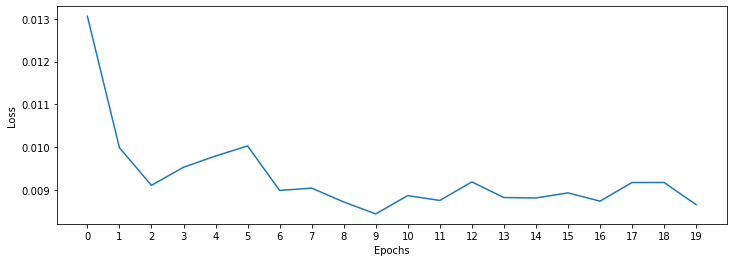

In [39]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
# Testando o modelo LSTM

In [40]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 31ms/step


In [41]:
lstm_predictions_scaled

[array([0.139476], dtype=float32),
 array([0.14879768], dtype=float32),
 array([0.15802202], dtype=float32),
 array([0.16697112], dtype=float32),
 array([0.1756328], dtype=float32),
 array([0.18392141], dtype=float32),
 array([0.19172573], dtype=float32),
 array([0.19893901], dtype=float32),
 array([0.20544694], dtype=float32),
 array([0.21151316], dtype=float32),
 array([0.21693884], dtype=float32),
 array([0.22125147], dtype=float32),
 array([0.22505999], dtype=float32),
 array([0.22805583], dtype=float32),
 array([0.23044105], dtype=float32),
 array([0.23241474], dtype=float32),
 array([0.23406239], dtype=float32),
 array([0.23543447], dtype=float32),
 array([0.23657319], dtype=float32),
 array([0.23751535], dtype=float32),
 array([0.23829545], dtype=float32),
 array([0.2389399], dtype=float32),
 array([0.23947163], dtype=float32),
 array([0.23991142], dtype=float32)]

In [79]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

list_tuple_LSTM = lstm_predictions.tolist()
list_LSTM=[]
for i in list_tuple_LSTM:
    list_LSTM.append(i[0])
    
y_LSTM = pd.Series(list_LSTM)

# Inserindo os dados da predição do modelo LSTM na tabela de resultado

df_test_results.insert(2, 'LSTM', y_LSTM.values)
df_test_results.head()

# Exportação da tabela de resultados para o formato excel

df_test_results.to_excel("output.xlsx")

In [43]:
# pip install pydot

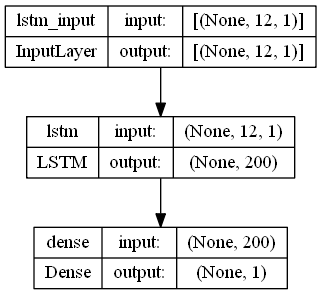

In [44]:
from keras.utils.vis_utils import plot_model
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
# Avaliação de Desempenho do Modelo LSTM

In [80]:
mape = np.mean(np.abs(y_LSTM.values - y_true)/np.abs(y_true))
mae = np.mean(np.abs(y_LSTM.values - y_true))
mpe = np.mean((y_LSTM.values - y_true)/y_true)
rmse = np.mean((y_LSTM.values - y_true)**2)**.5
corr = np.corrcoef(y_LSTM.values, y_true)[0,1]

print('Mean absolute percentage error - mape:', mape)
print('Mean absolute error - mae:', mae)
print('Mean percentage error - mpe:', mpe)
print('Root mean square error - rmse:', rmse)
print('Correlation coeficient:', corr)

Mean absolute percentage error - mape: 5.775935425843166
Mean absolute error - mae: 0.1791587740610043
Mean percentage error - mpe: 5.740485594590094
Root mean square error - rmse: 0.2591261815100069
Correlation coeficient: -0.5149879868084666
